# 1 .Set up
Something that has not been introduced until yet is the IPython.display module imported below. It allows us to render pandas dataframes without having to always say something like df at the end of a cell. This functionality will be showcased and used in the last part of assignment 5a. We also import the matplotlib modules we are going to use in 5b

In [ ]:
import numpy as np
import pandas as pd
import random

from IPython.display import display, HTML

from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

# 2. Generating the dataset>Below is the slightly modified solution proposal from last week. I have made a few artistic changes in terms of how the print statement looks and added a variable for people_susceptible. Also I have rewritten and added another variable called people_immune which increments when either a person is vaccinated, recovered or both (Check the advance days method for this change). As in last weeks assignment you will find instructions for the assignment below all the code. Worth noting is that this is the last you will see of the huge file, next assignment is just about working with a dataframe in pandas, as we did in week 3 but with the addition of introducing plots.>

# 3.The assigment
    3.1 Generating the data array

In [108]:
import random
import numpy as np

class Person:
    def __init__(self):
        self.recover_prob = 0.2
        self.die_prob = 0.05
        self.init_sick_prob = 0.1
        self.infect_others_prob = 0.05
        self.vaccinated = False
        self.recovered = False
        self.dead = False
        self.sick = False
        
        self.average_meetups = 10
        self.days_sick = 0
        self.init_sick_or_not()
        
    def init_sick_or_not(self):
        """When created each person starts as either sick or healthy"""
        prob = random.random()
        if prob <= self.init_sick_prob:
            # This should yield that about 10% of the people created are sick, the rest healthy
            self.sick = True
        else:
            self.sick = False
    
    def day_passes(self, population, init_scenario):
        """This method describes what happens to each person each day"""
        if self.sick == True:
            self.days_sick += 1
            if not init_scenario:
                self.infect_others(population)
        
        # Will the person recover?
        prob = random.random()
        if prob <= self.recover_prob and self.sick == True:
            # Person has rehabilitated and is now healthy!
            self.sick = False
            self.recovered = True 
        
        # If person is still sick they might die
        prob = random.random()
        if prob <= self.die_prob and self.sick == True:
            self.dead = True
            self.sick = False
            
    def infect_others(self, population):
        """Infect other people in the population"""
        person_encounters = random.sample(range(len(population)), self.average_meetups)
        for person_id in person_encounters:
            prob = random.random()
            person = population[person_id]
            if prob <= self.infect_others_prob and not (person.dead or person.recovered or person.vaccinated):
                population[person_id].sick = True

class Village:
    def __init__(self, init_population_size):
        self.population = [Person() for _ in range(init_population_size)]  # Use a list to store population
        self.init_vaccination = 0.2 * init_population_size
        self.daily_vaccination_threshold = 0.04 * init_population_size
        self.vaccination_started = False

    def advance_days(self, init_scenario=False):
        """Counts the status of the citizens in the community"""
        people_sick = 0
        people_recovered = 0
        people_dead = 0
        people_vaccinated = 0     
        people_immune = 0
        
        for person in self.population:
            if person.sick:
                people_sick += 1
            if person.dead:
                people_dead += 1
                
            if person.recovered and person.vaccinated:
                people_recovered += 1
                people_vaccinated += 1
                people_immune += 1
            elif person.vaccinated:
                people_vaccinated += 1
                people_immune += 1
            elif person.recovered:
                people_recovered += 1 
                people_immune += 1
            
            person.day_passes(self.population, init_scenario)
        
        people_susceptible = len(self.population) - (people_immune + people_dead + people_sick)
        
        if people_sick >= self.init_vaccination and not self.vaccination_started:
            print(f"Vaccination has started! At the end of the day {people_sick} are sick and the community is on the alert")
            self.vaccination_started = True
            
        if self.vaccination_started:
            self.vaccinate_population()
            
        return people_sick, people_recovered, people_dead, people_vaccinated, people_immune, people_susceptible
    
    def vaccinate_population(self):
        """Vaccinate the population daily"""
        people_vaccinated_today = 0
        
        for person in self.population:
            if people_vaccinated_today == self.daily_vaccination_threshold:
                break
            elif not person.sick and not person.dead and not person.vaccinated:
                person.vaccinated = True
                people_vaccinated_today += 1

    def start_simulation(self):
        """This function controls the simulation and what happens in a day"""
        #  Initialize an empty list to store day-by-day data
        day_data_list = []  # Local variable to store data for each day
        current_day = 0
         #  Create the day_data list before the while loop
        people_sick, people_recovered, people_dead, people_vaccinated, people_immune, people_susceptible = self.advance_days(init_scenario=True)
        day_data = [people_sick, people_recovered, people_dead, people_vaccinated, people_immune, people_susceptible]
           # Append day_data to day_data_list
       # day_data_list.append(day_data)       
        
        while people_sick != 0:
            print(f"By day {current_day} {people_sick} people are sick, {people_recovered} have recovered, and {people_dead} are dead.")
            current_day += 1
            
            people_sick, people_recovered, people_dead, people_vaccinated, people_immune, people_susceptible = self.advance_days()
            day_data = [people_sick, people_recovered, people_dead, people_vaccinated, people_immune, people_susceptible]
          #  Append day_data to day_data_list
            day_data_list.append(day_data)
        #    print(f"Day {current_day} data: {day_data}") 
        
        # The village is free of the virus, simulation ended
        days_sick = [person.days_sick for person in self.population if person.days_sick > 0]

        #  Convert day_data_list to a numpy array
        day_data_array = np.array(day_data_list)
        
        print("\n-------END OF SIMULATION-------")
        print(f"By day {current_day} {people_sick} people are sick, {people_recovered} have recovered, and {people_dead} are dead.")
        print(f"In total {people_vaccinated} people received vaccination, and {people_susceptible} remain susceptible to the virus.")
        print("--------------")
        print("The village has recovered and the virus is eliminated!")
        print("The longest time an individual was sick is: ", max(days_sick) if days_sick else 0, "days")
        print(  day_data_array)
def main():
    pop_size = 1000
    village = Village(pop_size)
    village.start_simulation()

if __name__ == "__main__":
    main()


By day 0 92 people are sick, 0 have recovered, and 0 are dead.
By day 1 83 people are sick, 18 have recovered, and 2 are dead.
By day 2 109 people are sick, 31 have recovered, and 4 are dead.
By day 3 134 people are sick, 50 have recovered, and 8 are dead.
By day 4 172 people are sick, 67 have recovered, and 12 are dead.
By day 5 199 people are sick, 97 have recovered, and 26 are dead.
Vaccination has started! At the end of the day 235 are sick and the community is on the alert
By day 6 235 people are sick, 138 have recovered, and 31 are dead.
By day 7 248 people are sick, 187 have recovered, and 38 are dead.
By day 8 237 people are sick, 245 have recovered, and 47 are dead.
By day 9 214 people are sick, 294 have recovered, and 59 are dead.
By day 10 193 people are sick, 333 have recovered, and 68 are dead.
By day 11 180 people are sick, 365 have recovered, and 76 are dead.
By day 12 159 people are sick, 405 have recovered, and 84 are dead.
By day 13 140 people are sick, 438 have recov

# 3.2 Creating the data frame and saving as csv file

In [78]:
import random
import pandas as pd
import numpy as np

class Person:
    def __init__(self):
        self.recover_prob = 0.2
        self.die_prob = 0.05
        self.init_sick_prob = 0.1
        self.infect_others_prob = 0.05
        self.vaccinated = False
        self.recovered = False
        self.dead = False
        self.sick = False
        
        self.average_meetups = 10
        self.days_sick = 0
        self.init_sick_or_not()
        
    def init_sick_or_not(self):
        """When created each person starts as either sick or healthy"""
        prob = random.random()
        if prob <= self.init_sick_prob:
            self.sick = True
        else:
            self.sick = False
    
    def day_passes(self, population, init_scenario):
        """This method describes what happens to each person each day"""
        if self.sick == True:
            self.days_sick += 1
            if not init_scenario:
                self.infect_others(population)
        
        # Will the person recover?
        prob = random.random()
        if prob <= self.recover_prob and self.sick == True:
            # Person has rehabilitated and is now healthy!
            self.sick = False
            self.recovered = True 
        
        # If person is still sick they might die
        prob = random.random()
        if prob <= self.die_prob and self.sick == True:
            self.dead = True
            self.sick = False
            
    def infect_others(self, population):
        """Infect other people in the population"""
        person_encounters = random.sample(range(len(population)), self.average_meetups)
        for person_id in person_encounters:
            prob = random.random()
            person = population[person_id]
            if prob <= self.infect_others_prob and not (person.dead or person.recovered or person.vaccinated):
                population[person_id].sick = True

class Village:
    def __init__(self, init_population_size):
        self.population = [Person() for _ in range(init_population_size)]  # Use a list to store population
        self.init_vaccination = 0.2 * init_population_size
        self.daily_vaccination_threshold = 0.04 * init_population_size
        self.vaccination_started = False
        self.day_data_list = []  # Correct initialization of day-by-day data list

    def advance_days(self, init_scenario=False):
        """Counts the status of the citizens in the community"""
        people_sick = 0
        people_recovered = 0
        people_dead = 0
        people_vaccinated = 0     
        people_immune = 0
        
        for person in self.population:
            if person.sick:
                people_sick += 1
            if person.dead:
                people_dead += 1
                
            if person.recovered and person.vaccinated:
                people_recovered += 1
                people_vaccinated += 1
                people_immune += 1
            elif person.vaccinated:
                people_vaccinated += 1
                people_immune += 1
            elif person.recovered:
                people_recovered += 1 
                people_immune += 1
            
            person.day_passes(self.population, init_scenario)        
           
  
        people_susceptible = len(self.population) - (people_immune + people_dead + people_sick)

        if people_sick >= self.init_vaccination and not self.vaccination_started:
            print(f"Vaccination has started! At the end of the day {people_sick} are sick and the community is on the alert")
            self.vaccination_started = True
            
        if self.vaccination_started:
            self.vaccinate_population()
        
        # Correct appending to day_data_list
        day_data = [people_sick, people_recovered, people_dead, people_vaccinated, people_immune, people_susceptible]
        self.day_data_list.append(day_data)  # Append the day data to the list
        
        return people_sick, people_recovered, people_dead, people_vaccinated, people_immune, people_susceptible
    
    def vaccinate_population(self):
        """Vaccinate the population daily"""
        people_vaccinated_today = 0
        
        for person in self.population:
            if people_vaccinated_today == self.daily_vaccination_threshold:
                break
            elif not person.sick and not person.dead and not person.vaccinated:
                person.vaccinated = True
                people_vaccinated_today += 1

    def start_simulation(self):
        """This function controls the simulation and what happens in a day"""
        
        current_day = 0
    
        people_sick, people_recovered, people_dead, people_vaccinated, people_immune, people_susceptible = self.advance_days(init_scenario=True)

        
        while people_sick != 0:
            print(f"By day {current_day} {people_sick} people are sick, {people_recovered} have recovered, and {people_dead} are dead.")
            current_day += 1
            
            people_sick, people_recovered, people_dead, people_vaccinated, people_immune, people_susceptible = self.advance_days()
            
        # The village is free of the virus, simulation ended
        days_sick = [person.days_sick for person in self.population if person.days_sick > 0]
        
        # Convert the data list to a numpy array
        day_data_array = np.array(self.day_data_list)
        
        # Call the method to generate the DataFrame and save it
        self.gen_df_and_save(day_data_array)
        
        print("\n-------END OF SIMULATION-------")
        print(f"By day {current_day} {people_sick} people are sick, {people_recovered} have recovered, and {people_dead} are dead.")
        print(f"In total {people_vaccinated} people received vaccination, and {people_susceptible} remain susceptible to the virus.")
        print("--------------")
        print("The village has recovered and the virus is eliminated!")
        print("The longest time an individual was sick is: ", max(days_sick) if days_sick else 0, "days")
    
    def gen_df_and_save(self, day_data_array):
        """Generate DataFrame and save as CSV"""
        # Create the column names
        columns = ['Sick', 'Recovered', 'Deceased', 'Vaccinated', 'Immune', 'Susceptible']
        
        # Create the DataFrame
        df = pd.DataFrame(day_data_array, columns=columns)
        
        # Display the DataFrame
        display(df)
        
        # Save the DataFrame as a CSV file
        df.to_csv('my_ass5_dataset.csv', index=False)
        
def main():
    pop_size = 1000
    village = Village(pop_size)
    village.start_simulation()

if __name__ == "__main__":
    main()


By day 0 114 people are sick, 0 have recovered, and 0 are dead.
By day 1 119 people are sick, 19 have recovered, and 6 are dead.
By day 2 149 people are sick, 39 have recovered, and 10 are dead.
By day 3 178 people are sick, 71 have recovered, and 12 are dead.
By day 4 199 people are sick, 104 have recovered, and 21 are dead.
Vaccination has started! At the end of the day 200 are sick and the community is on the alert
By day 5 200 people are sick, 157 have recovered, and 30 are dead.
By day 6 204 people are sick, 200 have recovered, and 37 are dead.
By day 7 206 people are sick, 237 have recovered, and 46 are dead.
By day 8 205 people are sick, 272 have recovered, and 54 are dead.
By day 9 190 people are sick, 318 have recovered, and 66 are dead.
By day 10 148 people are sick, 368 have recovered, and 79 are dead.
By day 11 137 people are sick, 396 have recovered, and 83 are dead.
By day 12 120 people are sick, 423 have recovered, and 92 are dead.
By day 13 100 people are sick, 446 have

,Sick,Recovered,Deceased,Vaccinated,Immune,Susceptible
0,114,0,0,0,0,886
1,119,19,6,0,19,856
2,149,39,10,0,39,802
3,178,71,12,0,71,739
4,199,104,21,0,104,676
5,200,157,30,0,157,613
6,204,200,37,40,231,528
7,206,237,46,80,292,456
8,205,272,54,120,348,393
9,190,318,66,160,418,326



-------END OF SIMULATION-------
By day 28 0 people are sick, 551 have recovered, and 121 are dead.
In total 879 people received vaccination, and 0 remain susceptible to the virus.
--------------
The village has recovered and the virus is eliminated!
The longest time an individual was sick is:  22 days


# Assignment 5b - Plotting and viewing our data
The assignment </h3>
<h4>2.1 Loading the data </h4>
<p>First off lets load the csv file into a pandas dataframe. Do this using the pdf.read_csv function and then also create a variable days that corresponds to the amount of rows in the dataframe.

In [136]:
import random
import pandas as pd
import numpy as np

class Person:
    def __init__(self):
        self.recover_prob = 0.2
        self.die_prob = 0.05
        self.init_sick_prob = 0.1
        self.infect_others_prob = 0.05
        self.vaccinated = False
        self.recovered = False
        self.dead = False
        self.sick = False
        
        self.average_meetups = 10
        self.days_sick = 0
        self.init_sick_or_not()
        
    def init_sick_or_not(self):
        """When created each person starts as either sick or healthy"""
        prob = random.random()
        if prob <= self.init_sick_prob:
            self.sick = True
        else:
            self.sick = False
    
    def day_passes(self, population, init_scenario):
        """This method describes what happens to each person each day"""
        if self.sick == True:
            self.days_sick += 1
            if not init_scenario:
                self.infect_others(population)
        
        # Will the person recover?
        prob = random.random()
        if prob <= self.recover_prob and self.sick == True:
            # Person has rehabilitated and is now healthy!
            self.sick = False
            self.recovered = True 
        
        # If person is still sick they might die
        prob = random.random()
        if prob <= self.die_prob and self.sick == True:
            self.dead = True
            self.sick = False
            
    def infect_others(self, population):
        """Infect other people in the population"""
        person_encounters = random.sample(range(len(population)), self.average_meetups)
        for person_id in person_encounters:
            prob = random.random()
            person = population[person_id]
            if prob <= self.infect_others_prob and not (person.dead or person.recovered or person.vaccinated):
                population[person_id].sick = True

class Village:
    def __init__(self, init_population_size):
        self.population = [Person() for _ in range(init_population_size)]  # Use a list to store population
        self.init_vaccination = 0.2 * init_population_size
        self.daily_vaccination_threshold = 0.04 * init_population_size
        self.vaccination_started = False
        self.day_data_list = []  # Correct initialization of day-by-day data list

    def advance_days(self, init_scenario=False):
        """Counts the status of the citizens in the community"""
        people_sick = 0
        people_recovered = 0
        people_dead = 0
        people_vaccinated = 0     
        people_immune = 0
        
        for person in self.population:
            if person.sick:
                people_sick += 1
            if person.dead:
                people_dead += 1
                
            if person.recovered and person.vaccinated:
                people_recovered += 1
                people_vaccinated += 1
                people_immune += 1
            elif person.vaccinated:
                people_vaccinated += 1
                people_immune += 1
            elif person.recovered:
                people_recovered += 1 
                people_immune += 1
            
            person.day_passes(self.population, init_scenario)        
           
  
        people_susceptible = len(self.population) - (people_immune + people_dead + people_sick)

        if people_sick >= self.init_vaccination and not self.vaccination_started:
          #  print(f"Vaccination has started! At the end of the day {people_sick} are sick and the community is on the alert")
            self.vaccination_started = True
            
        if self.vaccination_started:
            self.vaccinate_population()
        
        # Correct appending to day_data_list
        day_data = [people_sick, people_recovered, people_dead, people_vaccinated, people_immune, people_susceptible]
        self.day_data_list.append(day_data)  # Append the day data to the list
        
        return people_sick, people_recovered, people_dead, people_vaccinated, people_immune, people_susceptible
    
    def vaccinate_population(self):
        """Vaccinate the population daily"""
        people_vaccinated_today = 0
        
        for person in self.population:
            if people_vaccinated_today == self.daily_vaccination_threshold:
                break
            elif not person.sick and not person.dead and not person.vaccinated:
                person.vaccinated = True
                people_vaccinated_today += 1

    def start_simulation(self):
        """This function controls the simulation and what happens in a day"""
        
        current_day = 0
    
        people_sick, people_recovered, people_dead, people_vaccinated, people_immune, people_susceptible = self.advance_days(init_scenario=True)

        
        while people_sick != 0:
          #  print(f"By day {current_day} {people_sick} people are sick, {people_recovered} have recovered, and {people_dead} are dead.")
            current_day += 1
            
            people_sick, people_recovered, people_dead, people_vaccinated, people_immune, people_susceptible = self.advance_days()
            
        # The village is free of the virus, simulation ended
        days_sick = [person.days_sick for person in self.population if person.days_sick > 0]
        
        # Convert the data list to a numpy array
        day_data_array = np.array(self.day_data_list)
        
        # Call the method to generate the DataFrame and save it
        self.gen_df_and_save(day_data_array)
      
      # print("\n-------END OF SIMULATION-------")
      # print(f"By day {current_day} {people_sick} people are sick, {people_recovered} have recovered, and {people_dead} are dead.")
       # print(f"In total {people_vaccinated} people received vaccination, and {people_susceptible} remain susceptible to the virus.")
        # print("--------------")
        #print("The village has recovered and the virus is eliminated!")
       # print("The longest time an individual was sick is: ", max(days_sick) if days_sick else 0, "days")
       
    def gen_df_and_save(self, day_data_array):
        """Generate DataFrame and save as CSV"""
        # Create the column names
        columns = ['Sick', 'Recovered', 'Deceased', 'Vaccinated', 'Immune', 'Susceptible']
        
        # Create the DataFrame
        df = pd.DataFrame(day_data_array, columns=columns)
        
        # Display the DataFrame
        display(df)
        
        # Save the DataFrame as a CSV file
        df.to_csv('my_ass5_dataset.csv', index=False)
        num_days =len (df)
        print(f"\nNumber of days (rows): {num_days}")
def main():
    pop_size = 1000
    village = Village(pop_size)
    village.start_simulation()

if __name__ == "__main__":
    main()


,Sick,Recovered,Deceased,Vaccinated,Immune,Susceptible
0,111,0,0,0,0,889
1,103,25,8,0,25,864
2,138,40,11,0,40,811
3,156,78,14,0,78,752
4,190,107,17,0,107,686
5,207,145,23,0,145,625
6,236,177,30,40,208,526
7,251,214,39,80,271,439
8,246,266,44,120,342,368
9,231,314,53,160,414,302



Number of days (rows): 40


# <h4>2.2 Plotting the data </h4>

x-axis values: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49.]


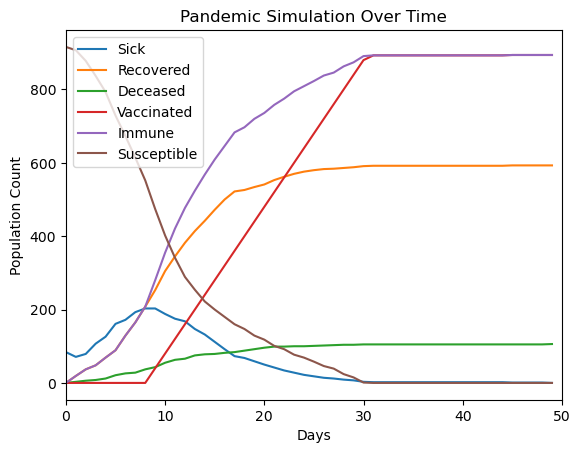

In [164]:
import random
import pandas as pd
import numpy as np

class Person:
    def __init__(self):
        self.recover_prob = 0.2
        self.die_prob = 0.05
        self.init_sick_prob = 0.1
        self.infect_others_prob = 0.05
        self.vaccinated = False
        self.recovered = False
        self.dead = False
        self.sick = False
        
        self.average_meetups = 10
        self.days_sick = 0
        self.init_sick_or_not()
        
    def init_sick_or_not(self):
        """When created each person starts as either sick or healthy"""
        prob = random.random()
        if prob <= self.init_sick_prob:
            self.sick = True
        else:
            self.sick = False
    
    def day_passes(self, population, init_scenario):
        """This method describes what happens to each person each day"""
        if self.sick == True:
            self.days_sick += 1
            if not init_scenario:
                self.infect_others(population)
        
        # Will the person recover?
        prob = random.random()
        if prob <= self.recover_prob and self.sick == True:
            # Person has rehabilitated and is now healthy!
            self.sick = False
            self.recovered = True 
        
        # If person is still sick they might die
        prob = random.random()
        if prob <= self.die_prob and self.sick == True:
            self.dead = True
            self.sick = False
            
    def infect_others(self, population):
        """Infect other people in the population"""
        person_encounters = random.sample(range(len(population)), self.average_meetups)
        for person_id in person_encounters:
            prob = random.random()
            person = population[person_id]
            if prob <= self.infect_others_prob and not (person.dead or person.recovered or person.vaccinated):
                population[person_id].sick = True

class Village:
    def __init__(self, init_population_size):
        self.population = [Person() for _ in range(init_population_size)]  # Use a list to store population
        self.init_vaccination = 0.2 * init_population_size
        self.daily_vaccination_threshold = 0.04 * init_population_size
        self.vaccination_started = False
        self.day_data_list = []  # Correct initialization of day-by-day data list

    def advance_days(self, init_scenario=False):
        """Counts the status of the citizens in the community"""
        people_sick = 0
        people_recovered = 0
        people_dead = 0
        people_vaccinated = 0     
        people_immune = 0
        
        for person in self.population:
            if person.sick:
                people_sick += 1
            if person.dead:
                people_dead += 1
                
            if person.recovered and person.vaccinated:
                people_recovered += 1
                people_vaccinated += 1
                people_immune += 1
            elif person.vaccinated:
                people_vaccinated += 1
                people_immune += 1
            elif person.recovered:
                people_recovered += 1 
                people_immune += 1
            
            person.day_passes(self.population, init_scenario)        
           
  
        people_susceptible = len(self.population) - (people_immune + people_dead + people_sick)

        if people_sick >= self.init_vaccination and not self.vaccination_started:
          #  print(f"Vaccination has started! At the end of the day {people_sick} are sick and the community is on the alert")
            self.vaccination_started = True
            
        if self.vaccination_started:
            self.vaccinate_population()
        
        # Correct appending to day_data_list
        day_data = [people_sick, people_recovered, people_dead, people_vaccinated, people_immune, people_susceptible]
        self.day_data_list.append(day_data)  # Append the day data to the list
        
        return people_sick, people_recovered, people_dead, people_vaccinated, people_immune, people_susceptible
    
    def vaccinate_population(self):
        """Vaccinate the population daily"""
        people_vaccinated_today = 0
        
        for person in self.population:
            if people_vaccinated_today == self.daily_vaccination_threshold:
                break
            elif not person.sick and not person.dead and not person.vaccinated:
                person.vaccinated = True
                people_vaccinated_today += 1
   
    def plot_data(self):
        """Plot the CSV data and save the graph"""
        
        # Load the CSV file into a pandas DataFrame
        df = pd.read_csv('my_ass5_dataset.csv')
        
        # Create the x-axis values (days)
        days = df.shape[0]  # Number of rows in the dataframe
        x = np.linspace(0, days - 1, days)
        print(f"x-axis values: {x}")  # Optional: Verify the x-axis values
        
        # Set plot limits and axis labels
        plt.xlim(0, days)
        plt.xlabel('Days')
        plt.ylabel('Population Count')
        
        # Plot each column in the dataframe
        for column in df.columns:
            plt.plot(x, df[column], label=column)
        
        # Add legend and title
        plt.legend()
        plt.title('Pandemic Simulation Over Time')
        
        # Save the plot as an image file (you can change the format by altering the extension)
        plt.savefig('pandemic_simulation_plot.png')

        # Show the plot (optional)
        plt.show()

    def start_simulation(self):
        """This function controls the simulation and what happens in a day"""
        
        current_day = 0
    
        people_sick, people_recovered, people_dead, people_vaccinated, people_immune, people_susceptible = self.advance_days(init_scenario=True)

        
        while people_sick != 0:
          #  print(f"By day {current_day} {people_sick} people are sick, {people_recovered} have recovered, and {people_dead} are dead.")
            current_day += 1
            
            people_sick, people_recovered, people_dead, people_vaccinated, people_immune, people_susceptible = self.advance_days()
            
        # The village is free of the virus, simulation ended
        days_sick = [person.days_sick for person in self.population if person.days_sick > 0]
        
        # Convert the data list to a numpy array
    #    day_data_array = np.array(self.day_data_list)
        
        # Call the method to generate the DataFrame and save it
      #  self.gen_df_and_save(day_data_array)
      
      # print("\n-------END OF SIMULATION-------")
      # print(f"By day {current_day} {people_sick} people are sick, {people_recovered} have recovered, and {people_dead} are dead.")
       # print(f"In total {people_vaccinated} people received vaccination, and {people_susceptible} remain susceptible to the virus.")
        # print("--------------")
        #print("The village has recovered and the virus is eliminated!")
       # print("The longest time an individual was sick is: ", max(days_sick) if days_sick else 0, "days")
       
   
def main():
    pop_size = 1000
    village = Village(pop_size)
    village.start_simulation()
    village.plot_data()

if __name__ == "__main__":
    main()


# 2.3 Some other interesting plots

,Sick,Recovered,Deceased,Vaccinated,Immune,Susceptible
0,101,0,0,0,0,899
1,105,19,3,0,19,873
2,143,35,7,0,35,815
3,175,57,14,0,57,754
4,194,89,26,0,89,691
5,229,130,32,0,130,609
6,239,171,44,40,198,519
7,240,214,53,80,268,439
8,233,257,65,120,330,372
9,217,308,72,160,404,307



Number of days (rows): 34

-------END OF SIMULATION-------
By day 33 0 people are sick, 586 have recovered, and 114 are dead.
In total 886 people received vaccination, and 0 remain susceptible to the virus.
The longest time an individual was sick is: 28 days


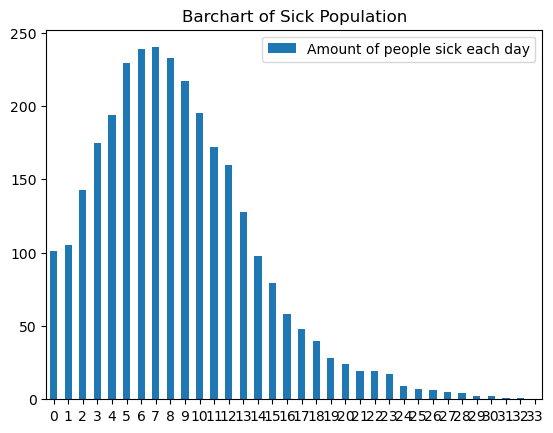

In [190]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

class Person:
    def __init__(self):
        self.recover_prob = 0.2
        self.die_prob = 0.05
        self.init_sick_prob = 0.1
        self.infect_others_prob = 0.05
        self.vaccinated = False
        self.recovered = False
        self.dead = False
        self.sick = False
        
        self.average_meetups = 10
        self.days_sick = 0
        self.init_sick_or_not()
        
    def init_sick_or_not(self):
        """When created, each person starts as either sick or healthy"""
        prob = random.random()
        if prob <= self.init_sick_prob:
            self.sick = True
        else:
            self.sick = False
    
    def day_passes(self, population, init_scenario):
        """This method describes what happens to each person each day"""
        if self.sick == True:
            self.days_sick += 1
            if not init_scenario:
                self.infect_others(population)
        
        # Will the person recover?
        prob = random.random()
        if prob <= self.recover_prob and self.sick == True:
            # Person has rehabilitated and is now healthy!
            self.sick = False
            self.recovered = True 
        
        # If person is still sick, they might die
        prob = random.random()
        if prob <= self.die_prob and self.sick == True:
            self.dead = True
            self.sick = False
            
    def infect_others(self, population):
        """Infect other people in the population"""
        person_encounters = random.sample(range(len(population)), self.average_meetups)
        for person_id in person_encounters:
            prob = random.random()
            person = population[person_id]
            if prob <= self.infect_others_prob and not (person.dead or person.recovered or person.vaccinated):
                population[person_id].sick = True


class Village:
    def __init__(self, init_population_size):
        self.population = [Person() for _ in range(init_population_size)]
        self.init_vaccination = 0.2 * init_population_size
        self.daily_vaccination_threshold = 0.04 * init_population_size
        self.vaccination_started = False
        self.day_data_list = []

    def advance_days(self, init_scenario=False):
        """Counts the status of the citizens in the community"""
        people_sick = 0
        people_recovered = 0
        people_dead = 0
        people_vaccinated = 0     
        people_immune = 0
        
        for person in self.population:
            if person.sick:
                people_sick += 1
            if person.dead:
                people_dead += 1
                
            if person.recovered and person.vaccinated:
                people_recovered += 1
                people_vaccinated += 1
                people_immune += 1
            elif person.vaccinated:
                people_vaccinated += 1
                people_immune += 1
            elif person.recovered:
                people_recovered += 1 
                people_immune += 1
            
            person.day_passes(self.population, init_scenario)
  
        people_susceptible = len(self.population) - (people_immune + people_dead + people_sick)

        if people_sick >= self.init_vaccination and not self.vaccination_started:
            self.vaccination_started = True
            
        if self.vaccination_started:
            self.vaccinate_population()
        
        day_data = [people_sick, people_recovered, people_dead, people_vaccinated, people_immune, people_susceptible]
        self.day_data_list.append(day_data)
        
        return people_sick, people_recovered, people_dead, people_vaccinated, people_immune, people_susceptible
    
    def vaccinate_population(self):
        """Vaccinate the population daily"""
        people_vaccinated_today = 0
        for person in self.population:
            if people_vaccinated_today == self.daily_vaccination_threshold:
                break
            elif not person.sick and not person.dead and not person.vaccinated:
                person.vaccinated = True
                people_vaccinated_today += 1

    def gen_df_and_save(self):
        """Generate DataFrame and save as CSV"""
        columns = ['Sick', 'Recovered', 'Deceased', 'Vaccinated', 'Immune', 'Susceptible']
        df = pd.DataFrame(self.day_data_list, columns=columns)
        display(df)
        df.to_csv('my_ass5_dataset.csv', index=False)
        num_days = len(df)
        print(f"\nNumber of days (rows): {num_days}")
   
  

    def bar_plot(self):
        """Create a bar plot of the Sick column"""
        try:
            df = pd.read_csv('my_ass5_dataset.csv')
        except FileNotFoundError:
            print("Error: CSV file not found. Ensure 'my_ass5_dataset.csv' exists.")
            return
        
        # Create a bar plot of the 'Sick' column
        df['Sick'].plot.bar(rot=0)
        
        # Set the title and legend
        plt.title('Barchart of Sick Population')
        plt.legend(['Amount of people sick each day'])
        
        # Show the plot
        plt.show()

    def start_simulation(self):
        """This function controls the simulation and what happens in a day"""
        current_day = 0
        people_sick, people_recovered, people_dead, people_vaccinated, people_immune, people_susceptible = self.advance_days(init_scenario=True)

        while people_sick != 0:
            current_day += 1
            people_sick, people_recovered, people_dead, people_vaccinated, people_immune, people_susceptible = self.advance_days()
        
        days_sick = [person.days_sick for person in self.population if person.days_sick > 0]
        self.gen_df_and_save()

        print("\n-------END OF SIMULATION-------")
        print(f"By day {current_day} {people_sick} people are sick, {people_recovered} have recovered, and {people_dead} are dead.")
        print(f"In total {people_vaccinated} people received vaccination, and {people_susceptible} remain susceptible to the virus.")
        print(f"The longest time an individual was sick is: {max(days_sick) if days_sick else 0} days")


def main():
    pop_size = 1000
    village = Village(pop_size)
    village.start_simulation()
    
    village.bar_plot()  # Call the bar_plot function to display the bar chart

if __name__ == "__main__":
    main()


,Sick,Recovered,Deceased,Vaccinated,Immune,Susceptible
0,104,0,0,0,0,896
1,97,23,4,0,23,876
2,143,39,8,0,39,810
3,166,77,14,0,77,743
4,194,114,23,0,114,669
5,214,158,32,0,158,596
6,231,202,42,40,233,494
7,236,254,48,80,311,405
8,225,297,58,120,378,339
9,220,337,65,160,436,279



Number of days (rows): 36

-------END OF SIMULATION-------
By day 35 0 people are sick, 616 have recovered, and 118 are dead.
In total 882 people received vaccination, and 0 remain susceptible to the virus.
The longest time an individual was sick is: 23 days


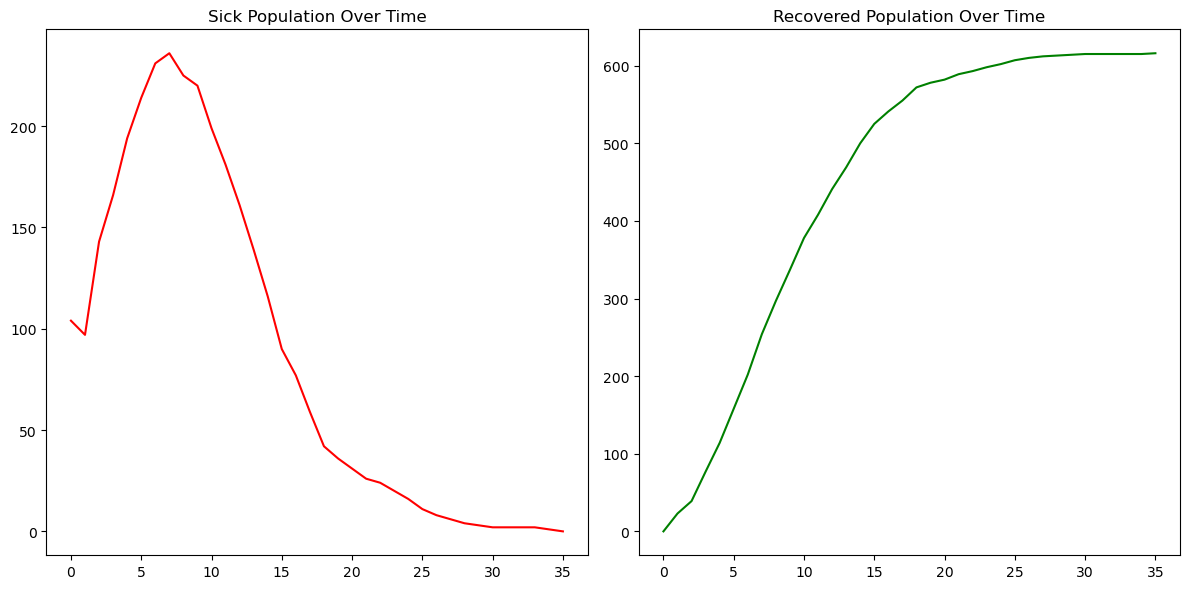

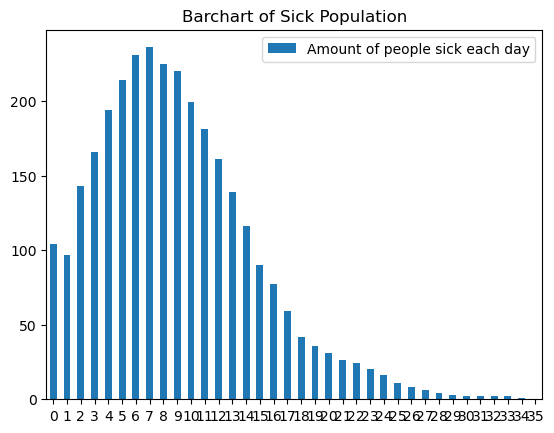

In [192]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

class Person:
    def __init__(self):
        self.recover_prob = 0.2
        self.die_prob = 0.05
        self.init_sick_prob = 0.1
        self.infect_others_prob = 0.05
        self.vaccinated = False
        self.recovered = False
        self.dead = False
        self.sick = False
        
        self.average_meetups = 10
        self.days_sick = 0
        self.init_sick_or_not()
        
    def init_sick_or_not(self):
        """When created, each person starts as either sick or healthy"""
        prob = random.random()
        if prob <= self.init_sick_prob:
            self.sick = True
        else:
            self.sick = False
    
    def day_passes(self, population, init_scenario):
        """This method describes what happens to each person each day"""
        if self.sick == True:
            self.days_sick += 1
            if not init_scenario:
                self.infect_others(population)
        
        # Will the person recover?
        prob = random.random()
        if prob <= self.recover_prob and self.sick == True:
            # Person has rehabilitated and is now healthy!
            self.sick = False
            self.recovered = True 
        
        # If person is still sick, they might die
        prob = random.random()
        if prob <= self.die_prob and self.sick == True:
            self.dead = True
            self.sick = False
            
    def infect_others(self, population):
        """Infect other people in the population"""
        person_encounters = random.sample(range(len(population)), self.average_meetups)
        for person_id in person_encounters:
            prob = random.random()
            person = population[person_id]
            if prob <= self.infect_others_prob and not (person.dead or person.recovered or person.vaccinated):
                population[person_id].sick = True


class Village:
    def __init__(self, init_population_size):
        self.population = [Person() for _ in range(init_population_size)]
        self.init_vaccination = 0.2 * init_population_size
        self.daily_vaccination_threshold = 0.04 * init_population_size
        self.vaccination_started = False
        self.day_data_list = []

    def advance_days(self, init_scenario=False):
        """Counts the status of the citizens in the community"""
        people_sick = 0
        people_recovered = 0
        people_dead = 0
        people_vaccinated = 0     
        people_immune = 0
        
        for person in self.population:
            if person.sick:
                people_sick += 1
            if person.dead:
                people_dead += 1
                
            if person.recovered and person.vaccinated:
                people_recovered += 1
                people_vaccinated += 1
                people_immune += 1
            elif person.vaccinated:
                people_vaccinated += 1
                people_immune += 1
            elif person.recovered:
                people_recovered += 1 
                people_immune += 1
            
            person.day_passes(self.population, init_scenario)
  
        people_susceptible = len(self.population) - (people_immune + people_dead + people_sick)

        if people_sick >= self.init_vaccination and not self.vaccination_started:
            self.vaccination_started = True
            
        if self.vaccination_started:
            self.vaccinate_population()
        
        day_data = [people_sick, people_recovered, people_dead, people_vaccinated, people_immune, people_susceptible]
        self.day_data_list.append(day_data)
        
        return people_sick, people_recovered, people_dead, people_vaccinated, people_immune, people_susceptible
    
    def vaccinate_population(self):
        """Vaccinate the population daily"""
        people_vaccinated_today = 0
        for person in self.population:
            if people_vaccinated_today == self.daily_vaccination_threshold:
                break
            elif not person.sick and not person.dead and not person.vaccinated:
                person.vaccinated = True
                people_vaccinated_today += 1

    def gen_df_and_save(self):
        """Generate DataFrame and save as CSV"""
        columns = ['Sick', 'Recovered', 'Deceased', 'Vaccinated', 'Immune', 'Susceptible']
        df = pd.DataFrame(self.day_data_list, columns=columns)
        display(df)
        df.to_csv('my_ass5_dataset.csv', index=False)
        num_days = len(df)
        print(f"\nNumber of days (rows): {num_days}")
   
  

    def bar_plot(self):
        """Create a bar plot of the Sick column"""
        try:
            df = pd.read_csv('my_ass5_dataset.csv')
        except FileNotFoundError:
            print("Error: CSV file not found. Ensure 'my_ass5_dataset.csv' exists.")
            return
        
        # Create a bar plot of the 'Sick' column
        df['Sick'].plot.bar(rot=0)
        
        # Set the title and legend
        plt.title('Barchart of Sick Population')
        plt.legend(['Amount of people sick each day'])
        
        # Show the plot
        plt.show()

    
    def mult_plots(self):
        """Plot the Sick and Recovered columns side by side"""
        try:
            df = pd.read_csv('my_ass5_dataset.csv')
        except FileNotFoundError:
            print("Error: CSV file not found. Ensure 'my_ass5_dataset.csv' exists.")
            return
        
        # Create subplots: 1 row and 2 columns
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
        
        # Plot the Sick column in the first subplot
        df['Sick'].plot(ax=axes[0], color='red', title='Sick Population Over Time')
        
        # Plot the Recovered column in the second subplot
        df['Recovered'].plot(ax=axes[1], color='green', title='Recovered Population Over Time')
        
        # Show the plots
        plt.tight_layout()
        plt.show()

    def start_simulation(self):
        """This function controls the simulation and what happens in a day"""
        current_day = 0
        people_sick, people_recovered, people_dead, people_vaccinated, people_immune, people_susceptible = self.advance_days(init_scenario=True)

        while people_sick != 0:
            current_day += 1
            people_sick, people_recovered, people_dead, people_vaccinated, people_immune, people_susceptible = self.advance_days()
        
        days_sick = [person.days_sick for person in self.population if person.days_sick > 0]
        self.gen_df_and_save()

        print("\n-------END OF SIMULATION-------")
        print(f"By day {current_day} {people_sick} people are sick, {people_recovered} have recovered, and {people_dead} are dead.")
        print(f"In total {people_vaccinated} people received vaccination, and {people_susceptible} remain susceptible to the virus.")
        print(f"The longest time an individual was sick is: {max(days_sick) if days_sick else 0} days")


def main():
    pop_size = 1000
    village = Village(pop_size)
    village.start_simulation()
    village.mult_plots()
    village.bar_plot()  # Call the bar_plot function to display the bar chart

if __name__ == "__main__":
    main()
